In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wymagane reguły: NR ALBUMU podzielić na 3 pary liczb + reguła 190.

In [172]:
# konwersja numeru albumu na listę reguł
def numer_na_reguly(numer_albumu):
    numer_str = str(numer_albumu)
    if len(numer_str) != 6:
        raise ValueError("album number has to have 6 digits")
    reguly = [int(numer_str[i:i+2]) for i in range(0, 6, 2)]
    reguly.append(190)  # reguła
    return reguly

Wielkość przestrzeni: użytkownik na początku programu może wprowadzić rozmiar siatki (długość automatu / liczbę komórek) i liczbę iteracji + obsługa błedów

In [173]:
def pobierz_parametry():
    while True:
        try:
            rozmiar = int(input("input size of grid: "))
            iteracje = int(input("input number of iterations: "))
            if rozmiar <= 0 or iteracje <= 0:
                raise ValueError
            break
        except ValueError:
            print("input a value bigger greater than 0.")
    return rozmiar, iteracje

In [174]:
# do wyznaczenia nowego stanu komórki na podstawie reguły
def nowy_stan_komorki(lewa, srodkowa, prawa, reguly):
    indeks = 4 * lewa + 2 * srodkowa + prawa
    return int(f"{reguly[indeks // 2]:08b}"[indeks % 8])

# do generowania losowego stanu początkowego
def generuj_stan_poczatkowy(rozmiar):
    return np.random.choice([0, 1], size=rozmiar)

*   Warunek brzegowy: periodyczny
*   Warunek brzegowy: absorpcyjny

In [175]:
# do jednej iteracji automatu z periodycznym warunkiem brzegowym
def iteracja_periodyczna(stan, reguly):
    nowy_stan = np.zeros_like(stan)
    for i in range(len(stan)):
        lewa = stan[i - 1] if i > 0 else stan[-1]
        prawa = stan[i + 1] if i < len(stan) - 1 else stan[0]
        nowy_stan[i] = nowy_stan_komorki(lewa, stan[i], prawa, reguly)
    return nowy_stan

# do jednej iteracji automatu z absorpcyjnym warunkiem brzegowym
def iteracja_absorpcyjna(stan, reguly):
    nowy_stan = np.zeros_like(stan)
    for i in range(len(stan)):
        lewa = stan[i - 1] if i > 0 else 0
        prawa = stan[i + 1] if i < len(stan) - 1 else 0
        nowy_stan[i] = nowy_stan_komorki(lewa, stan[i], prawa, reguly)
    return nowy_stan

In [176]:
def uruchom_automat(numer_albumu, rozmiar, iteracje, warunek_brzegowy):
    reguly = numer_na_reguly(numer_albumu)
    stan = generuj_stan_poczatkowy(rozmiar)
    historia = [stan.copy()]

    for _ in range(iteracje):
        if warunek_brzegowy == "periodyczny":
            stan = iteracja_periodyczna(stan, reguly)
        elif warunek_brzegowy == "absorpcyjny":
            stan = iteracja_absorpcyjna(stan, reguly)
        historia.append(stan.copy())

    return np.array(historia)

Zapis wyniku do pliku po i iteracjach (np. do formatu csv); Należy zapisać stan komórek z każdego kroku czasowego

In [177]:
def zapisz_do_csv(historia, nazwa_pliku="wynik.csv"):
    df = pd.DataFrame(historia)
    df.to_csv(nazwa_pliku, index=False, header=False)
    print(f"Wynik zapisano do pliku {nazwa_pliku}")

In [178]:
def wizualizuj_automat(historia, tytul="automat komórkowy 1D"):
    plt.figure(figsize=(10, len(historia) / 5))
    plt.imshow(historia, cmap="binary", interpolation="nearest")
    plt.title(tytul)
    plt.xlabel("pozycja komórki")
    plt.ylabel("iteracja")
    plt.show()

In [179]:
numer_albumu = 506045
rozmiar, iteracje = pobierz_parametry()

input size of grid: 50
input number of iterations: 50


Wynik zapisano do pliku wynik_periodyczny.csv


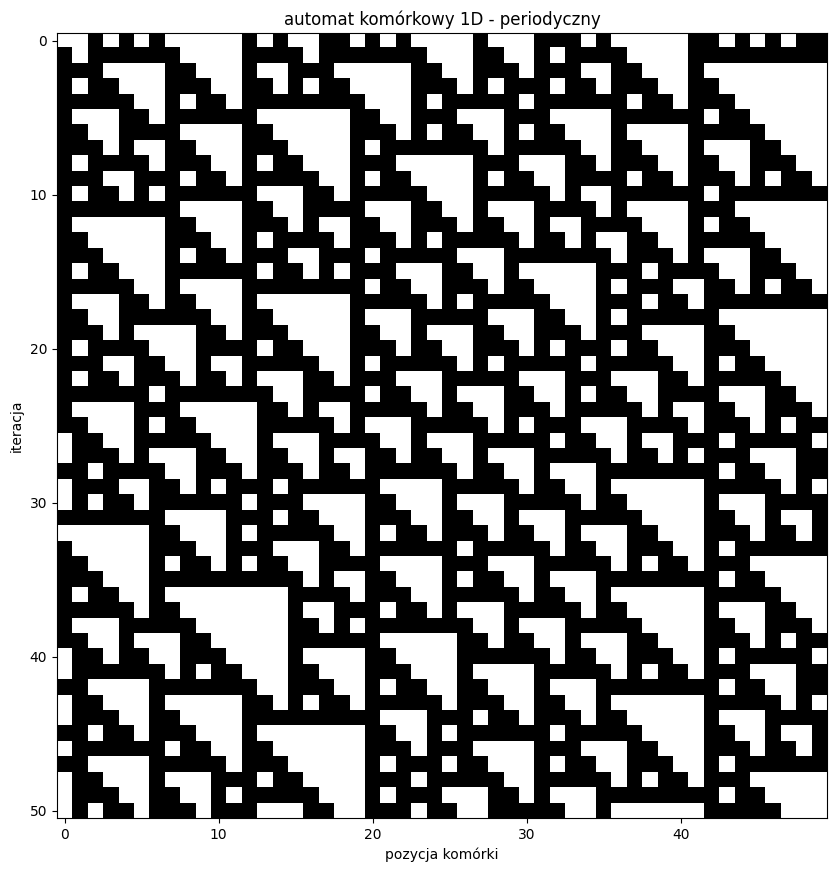

In [180]:
# periodyczny warunek
historia_periodyczna = uruchom_automat(numer_albumu, rozmiar, iteracje, "periodyczny")
zapisz_do_csv(historia_periodyczna, "wynik_periodyczny.csv")
wizualizuj_automat(historia_periodyczna, tytul="automat komórkowy 1D - periodyczny")

Wynik zapisano do pliku wynik_absorpcyjny.csv


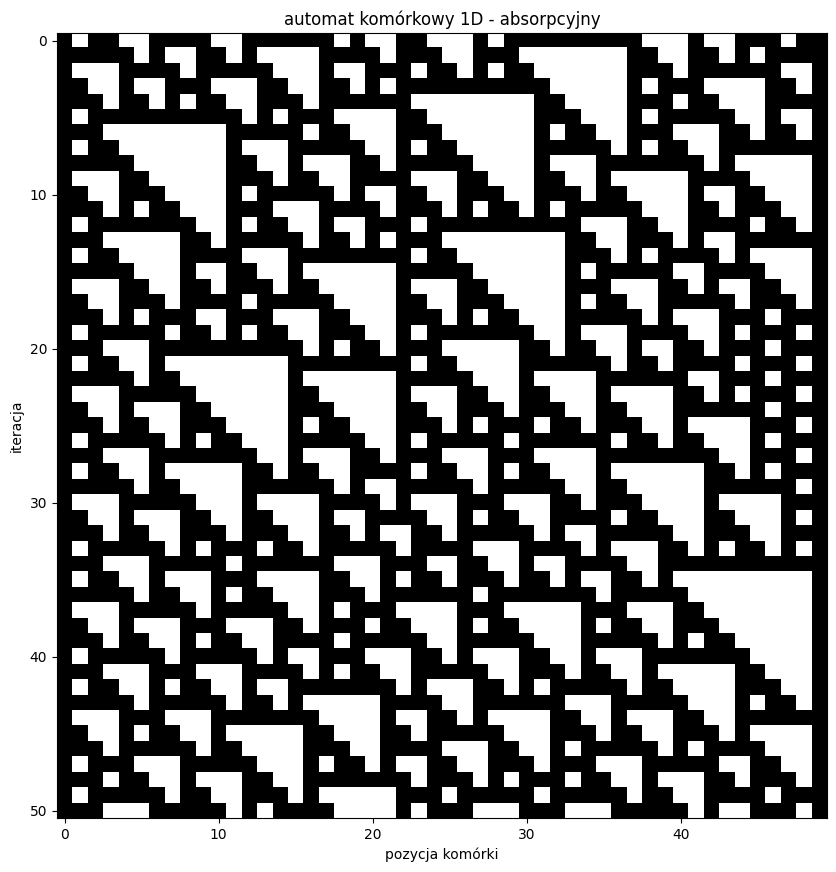

In [181]:
# absorpcyjny warunek
historia_absorpcyjna = uruchom_automat(numer_albumu, rozmiar, iteracje, "absorpcyjny")
zapisz_do_csv(historia_absorpcyjna, "wynik_absorpcyjny.csv")
wizualizuj_automat(historia_absorpcyjna, tytul="automat komórkowy 1D - absorpcyjny")